## **1. CNN 최신 경제 뉴스 URL 크롤링**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
import csv

# CNN Business Investing 페이지의 URL
url = "https://edition.cnn.com/business/investing"

try:
    # URL에 요청 보내기
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # 기사 URL 추출하기
    article_links = []
    for a in soup.find_all('a', href=True):
        link = a['href']
        if link.startswith('/'):
            article_links.append('https://edition.cnn.com' + link)

    # 중복 제거
    article_links = list(set(article_links))

    # CSV 파일로 쓰기
    with open('/content/drive/MyDrive/sentiment_analysis/CNN_news.csv', 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['URL'])
        for link in article_links:
            writer.writerow([link])

    print("CSV 파일이 성공적으로 생성되었습니다.")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

CSV 파일이 성공적으로 생성되었습니다.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/CNN_news.csv')
df

,URL
0,https://edition.cnn.com/2023/12/06/investing/b...
1,https://edition.cnn.com/2023/12/11/investing/m...
2,https://edition.cnn.com/2023/12/07/investing/p...
3,https://edition.cnn.com/2023/12/06/investing/p...
4,https://edition.cnn.com/2023/12/17/business/an...
5,https://edition.cnn.com/2023/12/11/investing/p...
6,https://edition.cnn.com/2023/12/14/investing/p...
7,https://edition.cnn.com/2023/12/17/investing/u...
8,https://edition.cnn.com/2023/12/07/investing/2...
9,https://edition.cnn.com/2023/12/12/investing/p...


In [ ]:
# 결과를 저장할 리스트
titles = []

# 각 URL에 대해 크롤링 수행
for url in df['URL']: # 'url'은 CSV 파일의 URL 컬럼 이름입니다.
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # CNN 웹사이트의 구조에 맞춰 제목을 추출하는 코드
        # 예: title = soup.find('h1', class_='some-class').get_text()
        title = soup.find('h1').get_text() # 이 부분은 실제 웹사이트 구조에 따라 수정해야 할 수 있습니다.

        titles.append(title)
    except Exception as e:
        titles.append("Error: " + str(e))

# 결과를 CSV 파일로 저장
pd.DataFrame({'titles': titles}).to_csv('cnn_titles.csv', index=False)

In [ ]:
df = pd.read_csv('/content/cnn_titles.csv')
df

,titles
0,"\n Harvard, Penn and MIT presidents under..."
1,\n Macy’s shares soar on report of buyout...
2,\n Retail investors are sitting out the s...
3,"\n Don’t count on bitcoin, gold or the Fe..."
4,\n Teamsters authorize February strike at...
5,\n Oil prices have been falling for seven...
6,\n The Fed just signaled rate cuts could ...
7,\n Uber is joining the S&P 500. Here’s wh...
8,\n 2023 was an ‘extinction’ level year fo...
9,\n Mark Zuckerberg had a surprisingly goo...


In [ ]:
# 불용어 리스트
stopwords = ['Uh', 'Your account', 'Index']

# 원본 CSV 파일
input_file = '/content/cnn_titles.csv'

# 결과를 저장할 CSV 파일
output_file = '/content/cnn_investing_articles.csv'

# 필터링된 행을 저장할 리스트
filtered_rows = []

with open(input_file, mode='r', encoding='utf-8', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        # 행의 내용이 불용어를 포함하지 않으면 리스트에 추가
        if not any(stopword in row[0] for stopword in stopwords):
            filtered_rows.append(row)

# 필터링된 리스트를 새로운 CSV 파일로 저장
with open(output_file, mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(filtered_rows)

print("불용어가 제거된 파일이 생성되었습니다.")

불용어가 제거된 파일이 생성되었습니다.


In [ ]:
df = pd.read_csv('/content/cnn_investing_articles.csv')
df

,titles
0,"\n Harvard, Penn and MIT presidents under..."
1,\n Macy’s shares soar on report of buyout...
2,\n Retail investors are sitting out the s...
3,"\n Don’t count on bitcoin, gold or the Fe..."
4,\n Teamsters authorize February strike at...
5,\n Oil prices have been falling for seven...
6,\n The Fed just signaled rate cuts could ...
7,\n Uber is joining the S&P 500. Here’s wh...
8,\n 2023 was an ‘extinction’ level year fo...
9,\n Mark Zuckerberg had a surprisingly goo...


## **2. finBERT**

In [ ]:
!pip install transformers torch

In [ ]:
import torch
import openpyxl

In [ ]:
# 파이프라인 API 사용해서 FinBERT 모델 로드
from transformers import pipeline

pipe = pipeline("sentiment-analysis", model="ProsusAI/finbert")

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [ ]:
import pandas as pd

df = pd.read_csv('/content/cnn_investing_articles.csv', encoding='utf-8')

In [ ]:
# 결과를 저장할 리스트
sentiments = []

for text in df.iloc[:, 0]:  # 첫 번째 열의 각 행에 대해 반복
    # 텍스트 인코딩
    inputs = tokenizer(text, return_tensors="pt")

    # 인퍼런스 수행
    with torch.no_grad():
        logits = model(**inputs).logits

    # 결과 해석
    predicted_class_id = logits.argmax().item()
    labels = ['positive', 'negative', 'neutral']
    sentiment = labels[predicted_class_id]

    # 결과 저장
    sentiments.append(sentiment)

# 결과를 새로운 열로 추가
df['Predict'] = sentiments

# 결과 확인
print(df)

                                               titles   Predict
0   \n      Costco’s hottest item isn’t rotisserie...   neutral
1   \n      Americans are no longer ready to shop ...   neutral
2   \n      Quaker Oats recalls dozens of products...  negative
3   \n      Europe’s leading tour company could qu...  negative
4   \n      Macy’s shares soar on report of buyout...  positive
5   \n      The battle for the future of Disney ju...   neutral
6   \n      TikTok is pushing longer videos. Some ...  negative
7   \n      Dow reaches record high as Fed pivots ...  positive
8   \n      Elon Musk seeking to raise $1 billion ...   neutral
9   \n      Germany’s stock market just hit a new ...   neutral
10  \n      Oil prices have been falling for seven...  negative
11  \n      Retail investors are sitting out the s...  negative
12  \n      Comfort Inn’s owner doubles down on it...  negative
13  \n      What the Fed’s looming rate cuts would...   neutral
14  \n      2023 was an ‘extinction’ lev

In [ ]:
positive = 0
negative = 0
neutral = 0

for i in range(df['Predict'].count()):
    if df['Predict'].iloc[i] == "positive":
      positive += 1
    elif df['Predict'].iloc[i] == "negative":
      negative += 1
    else:
      neutral += 1

print(positive, negative, neutral)

3 7 12


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(3)
predict = ['netral', 'positive', 'negative']
values = [neutral, positive, negative]

plt.bar(x, values)
plt.xticks(x, predict)
plt.bar(x, values, color=['y','r','b'])
plt.title('일반 경제 뉴스 감정분석')

plt.show()

- 일반 경제뉴스를 감정분석해보니, 어떤 것에 대한 부정적인 판단인지 해석 불가함으로 테마주를 선정하여 해당 테마주에 대한 감정분석을 시행하기로 함

### **3. 테마주별 기사 제목 크롤링**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/CNN_theme.csv')
df

,rechargeable battery,Cryptocurrency,recession,alopecia
0,https://edition.cnn.com/2023/12/08/business/te...,https://edition.cnn.com/2023/12/02/opinions/bi...,https://edition.cnn.com/2023/12/15/economy/eco...,https://edition.cnn.com/style/article/male-pat...
1,https://edition.cnn.com/2023/10/11/tech/samsun...,https://edition.cnn.com/2023/11/29/politics/cr...,https://edition.cnn.com/2023/12/15/economy/chi...,https://edition.cnn.com/2022/03/29/health/what...
2,https://edition.cnn.com/cnn-underscored/review...,https://edition.cnn.com/2023/11/22/business/ta...,https://edition.cnn.com/2023/12/14/economy/ret...,https://edition.cnn.com/style/article/carly-fi...
3,https://edition.cnn.com/2023/07/24/business/st...,https://edition.cnn.com/2023/11/21/investing/w...,https://edition.cnn.com/2023/12/14/investing/w...,https://edition.cnn.com/2020/01/20/politics/ay...
4,https://edition.cnn.com/2023/06/20/us/nyc-ebik...,https://edition.cnn.com/2023/10/24/investing/b...,https://edition.cnn.com/2023/12/13/economy/inf...,https://edition.cnn.com/2023/06/19/opinions/ca...
5,https://edition.cnn.com/2023/03/09/tech/lithiu...,https://edition.cnn.com/video/news/2017/11/30/...,https://edition.cnn.com/2023/12/13/economy/nov...,https://edition.cnn.com/2022/11/04/health/how-...
6,https://edition.cnn.com/2023/01/04/tech/apple-...,https://edition.cnn.com/video/news/2013/04/04/...,https://edition.cnn.com/2023/12/10/economy/sto...,https://edition.cnn.com/2023/02/15/business/ol...
7,https://edition.cnn.com/2022/10/11/business/ho...,https://edition.cnn.com/video/news/2014/11/14/...,https://edition.cnn.com/2023/12/08/economy/nov...,https://edition.cnn.com/2022/11/02/health/unco...
8,https://edition.cnn.com/2022/08/21/business/aa...,https://edition.cnn.com/video/news/2013/12/10/...,https://edition.cnn.com/2023/12/08/investing/p...,https://edition.cnn.com/videos/beauty/2022/05/...
9,https://edition.cnn.com/2022/06/01/cars/tesla-...,https://edition.cnn.com/videos/world/2023/10/1...,https://edition.cnn.com/2023/12/07/investing/2...,https://edition.cnn.com/2022/03/29/entertainme...


In [ ]:
# 기사 제목 추출 메서드 WebScraper

class WebScraper:
    def __init__(self, dataframe, column_name):
        self.dataframe = dataframe
        self.column_name = column_name

    def scrape_titles(self):
        # 결과를 저장할 리스트
        titles = []

        # 각 URL에 대해 크롤링 수행
        for url in self.dataframe[self.column_name]:
            try:
                response = requests.get(url)
                soup = BeautifulSoup(response.content, 'html.parser')
                title = soup.find('h1').get_text()
                titles.append(title)
            except Exception as e:
                titles.append("Error: " + str(e))

        # 결과를 반환 (옵션)
        return pd.DataFrame({'titles': titles})

In [ ]:
# rechargeable battery 관련 기사 제목 추출
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/CNN_theme.csv') # 여기에 DataFrame을 할당합니다.
column_name = 'rechargeable battery'  # URL이 포함된 컬럼 이름

# 클래스 인스턴스 생성
scraper = WebScraper(df, column_name)

# 웹 크롤링 수행 및 결과 확인
title_battery = scraper.scrape_titles()
title_battery

,titles
0,\n Tesla failed at battery swapping. Stel...
1,\n Stellantis to put second battery plant...
2,Error: 'NoneType' object has no attribute 'get...
3,\n New EV battery plant fuels labor tensi...
4,\n Fire that killed 4 at NYC e-bike store...
5,\n Lithium-ion battery fires are happenin...
6,\n Apple is raising the price of iPhone b...
7,\n Honda and LG are spending $3.5 billion...
8,\n Why you can’t always throw AA batterie...
9,\n The next holy grail for EVs: Batteries...


In [ ]:
# Cryptocurrency 관련 기사 제목 추출
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/CNN_theme.csv') # 여기에 DataFrame을 할당합니다.
column_name = 'Cryptocurrency'  # URL이 포함된 컬럼 이름

# 클래스 인스턴스 생성
scraper = WebScraper(df, column_name)

# 웹 크롤링 수행 및 결과 확인
title_Cryptocurrency = scraper.scrape_titles()
title_Cryptocurrency

,titles
0,\n Opinion: Why crypto was the perfect to...
1,"\n US, European officials crack down on c..."
2,\n 5 takeaways from America’s biggest cry...
3,"\n What is Binance, why is it in so much ..."
4,\n Why bitcoin is surging again\n
5,\n What’s the future of virtual currency?...
6,\n How Bitcoin works\n
7,\n ISIS plans to create its own currency\...
8,\n Ron Paul: Bitcoin could help end dolla...
9,\n Analyst: How Hamas is using cryptocurr...


In [ ]:
# recession 관련 기사 제목 추출
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/CNN_theme.csv') # 여기에 DataFrame을 할당합니다.
column_name = 'recession'  # URL이 포함된 컬럼 이름

# 클래스 인스턴스 생성
scraper = WebScraper(df, column_name)

# 웹 크롤링 수행 및 결과 확인
title_recession = scraper.scrape_titles()
title_recession

,titles
0,\n Biden’s top economist bets on soft lan...
1,\n Beijing is trying hard to ward off a s...
2,\n US retail sales rebound\n
3,\n What the Fed’s looming rate cuts would...
4,"\n Inflation is cooling, but not everyone..."
5,\n US wholesale inflation dropped to 0.9%...
6,\n The Fed’s higher-for-longer strategy o...
7,"\n The US economy added 199,000 jobs in N..."
8,\n Americans are no longer ready to shop ...
9,\n 2023 was an ‘extinction’ level year fo...


In [ ]:
# alopecia 관련 기사 제목 추출
df = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/CNN_theme.csv') # 여기에 DataFrame을 할당합니다.
column_name = 'alopecia'  # URL이 포함된 컬럼 이름

# 클래스 인스턴스 생성
scraper = WebScraper(df, column_name)

# 웹 크롤링 수행 및 결과 확인
title_alopecia = scraper.scrape_titles()
title_alopecia

,titles
0,\n The art of growing bald gracefully\n
1,"\n What causes alopecia, a ‘devastating’ ..."
2,\n Appearance activist Carly Findlay: ‘Vi...
3,\n Rep. Ayanna Pressley speaks at event a...
4,\n Opinion: I was shocked to learn there ...
5,\n The truth about how often you should w...
6,\n Olaplex sued for allegedly causing hai...
7,\n Scientists identify genes that can cau...
8,\n Karamo Brown talks baldness while gett...
9,\n Jada Pinkett Smith talked loving her b...


## **4. 테마주별 감정분석 시행**



In [ ]:
# 감정분석 메서드
class SentimentAnalyzer:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def predict(self, df):
        # 결과를 저장할 리스트
        sentiments = []

        for text in df.iloc[:, 0]:
            # 텍스트 인코딩
            inputs = self.tokenizer(text, return_tensors="pt")

            # 인퍼런스 수행
            with torch.no_grad():
                logits = self.model(**inputs).logits

            # 결과 해석
            predicted_class_id = logits.argmax().item()
            labels = ['positive', 'negative', 'neutral']
            sentiment = labels[predicted_class_id]

            # 결과 저장
            sentiments.append(sentiment)

        # 결과를 새로운 열로 추가
        df['Predict'] = sentiments

        # 결과 확인
        return df

In [ ]:
# 시각화 메서드
import matplotlib.pyplot as plt
import numpy as np

class SentimentVisualization:
    def __init__(self, df):
        self.df = df

    def count_sentiments(self):
        # 감정별 카운트를 초기화합니다.
        self.positive = 0
        self.negative = 0
        self.neutral = 0

        # DataFrame의 'Predict' 열에 대해 감정을 카운트합니다.
        for sentiment in self.df['Predict']:
            if sentiment == "positive":
                self.positive += 1
            elif sentiment == "negative":
                self.negative += 1
            else:
                self.neutral += 1

    def plot_sentiments(self):
        # 감정별 빈도를 계산합니다.
        self.count_sentiments()

        # 데이터 준비
        x = np.arange(3)
        labels = ['Neutral', 'Positive', 'Negative']
        values = [self.neutral, self.positive, self.negative]

        # 막대 그래프 생성
        plt.bar(x, values, color=['yellow', 'red', 'blue'])
        plt.xticks(x, labels)
        plt.ylabel('Frequency')

        # 그래프 표시
        plt.show()


In [ ]:
# battery 관련 기사 감정분석

# 모델과 토크나이저 초기화
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# 클래스 인스턴스 생성
analyzer = SentimentAnalyzer(model, tokenizer)

# 데이터 프레임에 대해 예측 수행
df = title_battery  # 데이터 프레임
result_battery = analyzer.predict(df)
print(result_battery)

                                               titles   Predict
0   \n      Tesla failed at battery swapping. Stel...   neutral
1   \n      Stellantis to put second battery plant...   neutral
2   Error: 'NoneType' object has no attribute 'get...   neutral
3   \n      New EV battery plant fuels labor tensi...  negative
4   \n      Fire that killed 4 at NYC e-bike store...  negative
5   \n      Lithium-ion battery fires are happenin...   neutral
6   \n      Apple is raising the price of iPhone b...   neutral
7   \n      Honda and LG are spending $3.5 billion...   neutral
8   \n      Why you can’t always throw AA batterie...   neutral
9   \n      The next holy grail for EVs: Batteries...   neutral
10  \n      How a battery shortage could threaten ...  negative
11  \n      Lithium-ion battery sparks apartment b...   neutral
12  \n      Stellantis is the latest automaker pla...   neutral
13  Error: 'NoneType' object has no attribute 'get...   neutral
14  \n      Volkswagen is going huge in 

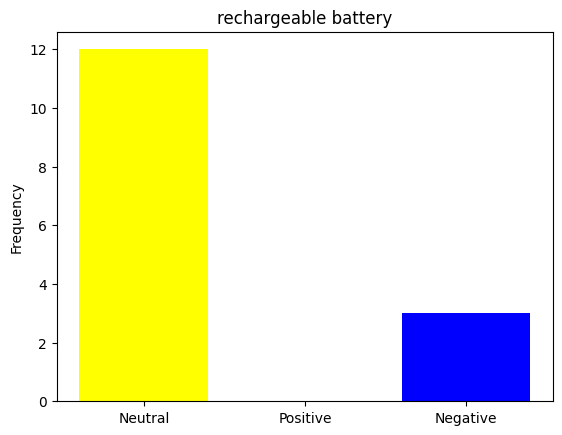

In [ ]:
# 클래스 인스턴스 생성
visualizer = SentimentVisualization(title_battery)

# 감정 분석 결과 시각화
plt.title('rechargeable battery')
visualizer.plot_sentiments()

In [ ]:
# Cryptocurrency 관련 기사 감정분석

# 모델과 토크나이저 초기화
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# 클래스 인스턴스 생성
analyzer = SentimentAnalyzer(model, tokenizer)

# 데이터 프레임에 대해 예측 수행
df = title_Cryptocurrency  # 데이터 프레임
result_Cryptocurrency = analyzer.predict(df)
print(result_Cryptocurrency)

                                               titles   Predict
0   \n      Opinion: Why crypto was the perfect to...   neutral
1   \n      US, European officials crack down on c...  negative
2   \n      5 takeaways from America’s biggest cry...   neutral
3   \n      What is Binance, why is it in so much ...   neutral
4          \n      Why bitcoin is surging again\n       neutral
5   \n      What’s the future of virtual currency?...   neutral
6                     \n      How Bitcoin works\n       neutral
7   \n      ISIS plans to create its own currency\...   neutral
8   \n      Ron Paul: Bitcoin could help end dolla...  positive
9   \n      Analyst: How Hamas is using cryptocurr...   neutral
10  \n      Crypto assets soar as US court clears ...   neutral
11  \n      Bitcoin price on the skids as investor...  negative
12  \n      Coinbase launches independent pro-cryp...   neutral
13  \n      Feeling crypto FOMO? Scammers are coun...   neutral
14  \n      OpenAI’s Sam Altman launches

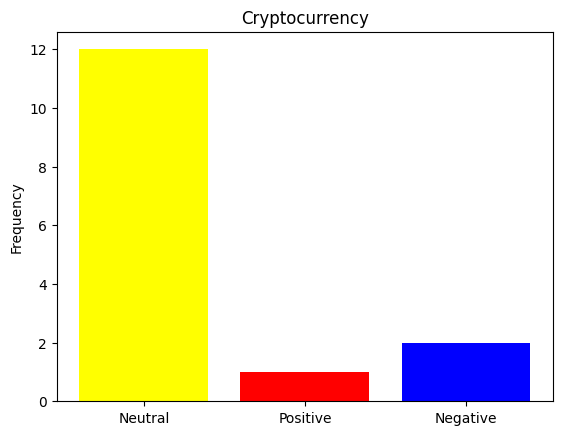

In [ ]:
# 클래스 인스턴스 생성
visualizer = SentimentVisualization(result_Cryptocurrency)

# 감정 분석 결과 시각화
plt.title('Cryptocurrency')
visualizer.plot_sentiments()

In [ ]:
# recession 관련 기사 감정분석

# 모델과 토크나이저 초기화
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# 클래스 인스턴스 생성
analyzer = SentimentAnalyzer(model, tokenizer)

# 데이터 프레임에 대해 예측 수행
df = title_recession  # 데이터 프레임
result_recession = analyzer.predict(df)
print(result_recession)

                                               titles   Predict
0   \n      Biden’s top economist bets on soft lan...  negative
1   \n      Beijing is trying hard to ward off a s...  negative
2               \n      US retail sales rebound\n       neutral
3   \n      What the Fed’s looming rate cuts would...   neutral
4   \n      Inflation is cooling, but not everyone...   neutral
5   \n      US wholesale inflation dropped to 0.9%...  negative
6   \n      The Fed’s higher-for-longer strategy o...  negative
7   \n      The US economy added 199,000 jobs in N...  positive
8   \n      Americans are no longer ready to shop ...   neutral
9   \n      2023 was an ‘extinction’ level year fo...   neutral
10           Bank CEOs warn about a looming recession  negative
11  \n      Is a recession on the horizon? More ba...  negative
12  \n      Jamie Dimon says to be prepared for re...   neutral
13  \n      The US economy grew by 5.2% in the thi...  positive
14  \n      Why investors are looking fo

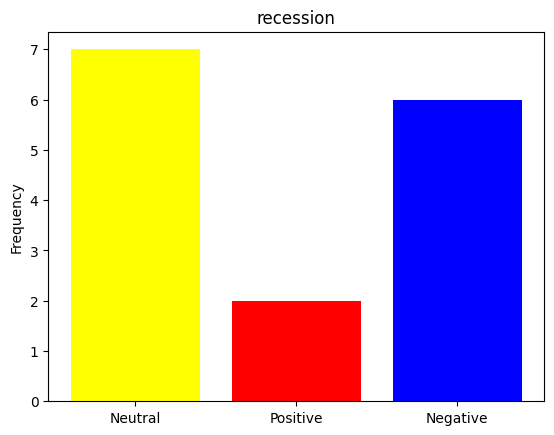

In [ ]:
# 클래스 인스턴스 생성
visualizer = SentimentVisualization(result_recession)

# 감정 분석 결과 시각화
plt.title('recession')
visualizer.plot_sentiments()

In [ ]:
# alopecia 관련 기사 감정분석

# 모델과 토크나이저 초기화
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# 클래스 인스턴스 생성
analyzer = SentimentAnalyzer(model, tokenizer)

# 데이터 프레임에 대해 예측 수행
df = title_alopecia  # 데이터 프레임
result_alopecia = analyzer.predict(df)
print(result_alopecia)

                                               titles   Predict
0    \n      The art of growing bald gracefully\n       neutral
1   \n      What causes alopecia, a ‘devastating’ ...   neutral
2   \n      Appearance activist Carly Findlay: ‘Vi...   neutral
3   \n      Rep. Ayanna Pressley speaks at event a...   neutral
4   \n      Opinion: I was shocked to learn there ...  positive
5   \n      The truth about how often you should w...   neutral
6   \n      Olaplex sued for allegedly causing hai...  negative
7   \n      Scientists identify genes that can cau...   neutral
8   \n      Karamo Brown talks baldness while gett...   neutral
9   \n      Jada Pinkett Smith talked loving her b...   neutral
10  \n      One male hair loss treatment works bet...  positive
11  \n      Easy, breezy … bald? James Charles say...   neutral
12  \n      Tom Hanks reveals he shaved his head f...   neutral
13  \n      Ready to cut your long, quarantine hai...   neutral
14  \n      With hair loss on the rise, 

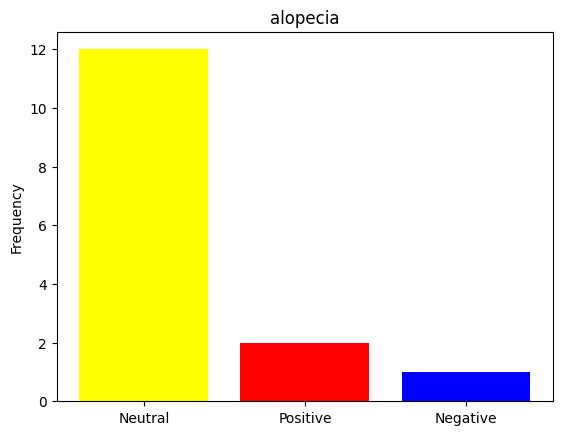

In [ ]:
# 클래스 인스턴스 생성
visualizer = SentimentVisualization(result_alopecia)

# 감정 분석 결과 시각화
plt.title('alopecia')
visualizer.plot_sentiments()